## Task 3 Student Performance Prediction (Portuguese School DataSet)


#### Name : Naveen Vamshi
#### R.No : 160117733101

**AIM:** To load Portugese Students dataset and predict Final Grades of the students using 1st and 2nd semester grades. All regression algorithms will be covered here

**Description:** Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent (target) and independent variable (s) (predictor). This technique is used for forecasting, time series modelling and finding the causal effect relationship between the variables.

 
Regression analysis is an important tool for modelling and analyzing data. Here, we fit a curve / line to the data points, in such a manner that the differences between the distances of data points from the curve or line is minimized.


### 1. Linear Regression

It is one of the most widely known modeling technique. Linear regression is usually among the first few topics which people pick while learning predictive modeling. In this technique, the dependent variable is continuous, independent variable(s) can be continuous or discrete, and nature of regression line is linear.

Linear Regression establishes a relationship between dependent variable (Y) and one or more independent variables (X) using a best fit straight line (also known as regression line).
It is represented by an equation Y=a+b*X + e, where a is intercept, b is slope of the line and e is error term. This equation can be used to predict the value of target variable based on given predictor variable(s).


### 2. Polynomial Regression
A regression equation is a polynomial regression equation if the power of independent variable is more than 1. The equation below represents a polynomial equation:

In this regression technique, the best fit line is not a straight line. It is rather a curve that fits into the data points.



### 3. Ridge Regression
Ridge Regression is a technique used when the data suffers from multicollinearity (independent variables are highly correlated). In multicollinearity, even though the least squares estimates (OLS) are unbiased, their variances are large which deviates the observed value far from the true value. By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors.

Above, we saw the equation for linear regression. Remember? It can be represented as:

y=a+ b*x

This equation also has an error term.
In a linear equation, prediction errors can be decomposed into two sub components. First is due to the biased and second is due to the variance. Prediction error can occur due to any one of these two or both components. Here, we’ll discuss about the error caused due to variance.

Ridge regression solves the multicollinearity problem through shrinkage parameter λ (lambda). Look at the equation below.

 In this equation, we have two components. First one is least square term and other one is lambda of the summation of β2 (beta- square) where β is the coefficient. This is added to least square term in order to shrink the parameter to have a very low variance.

### 4. Lasso Regression

Similar to Ridge Regression, Lasso (Least Absolute Shrinkage and Selection Operator) also penalizes the absolute size of the regression coefficients. In addition, it is capable of reducing the variability and improving the accuracy of linear regression models.  Look at the equation below: Lasso regression differs from ridge regression in a way that it uses absolute values in the penalty function, instead of squares. This leads to penalizing (or equivalently constraining the sum of the absolute values of the estimates) values which causes some of the parameter estimates to turn out exactly zero. Larger the penalty applied, further the estimates get shrunk towards absolute zero. This results to variable selection out of given n variables.

![image1.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/Lasso.png)

### 5. ElasticNet Regression

ElasticNet is hybrid of Lasso and Ridge Regression techniques. It is trained with L1 and L2 prior as regularizer. Elastic-net is useful when there are multiple features which are correlated. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

![img3.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/Elastic_Net.png)

A practical advantage of trading-off between Lasso and Ridge is that, it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

**Important Points:**
* It encourages group effect in case of highly correlated variables
* There are no limitations on the number of selected variables
* It can suffer with double shrinkage

In the given data set,the data approaches student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). The dataset's attributes include student grades, demographic, social and school-related features. The data was collected by using school reports and questionnaires.

There are three columns for the grades:
- G1 - first-period grade
- G2 - second-period grade
- G3 - the final grade

All grades are numeric, from 0 to 20.

The goal of the notebook is to predict the final grade (G3). The G1 and G2 have high correlation to the final grade. For this purpose, it was decided to predict the final grade without using periodic grades. This resolution allows to produce higher value.

### Data Preprocesing

The first step is loading the data and dropping the G1 and G2 columns.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [9]:
df = pd.read_csv("/home/naveen/Desktop/jupyter practice/csvfiles/student-mat.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.drop(columns=['G1', 'G2'], axis=1, inplace=True)

Check for missing values

In [6]:
df.isnull().sum(axis=0).sum()

0

In [8]:
len(df)

395

The number of samples is relatively low. For this reason, checking of the skewness of columns was performed. Correlation to the goal was checked as well.

Note: to allow calculation of skewness and correlation to the final grade categorical data was LabelEncodered. The appropriate transformation (after investigation) will be performed later.

In [11]:
labeled_data = df.apply(LabelEncoder().fit_transform)

summary = pd.concat([df.dtypes, df.nunique(), labeled_data.skew().abs(), labeled_data.corr()['G3']], axis=1).sort_values(2, ascending=False).head(10)
summary.columns=['type', 'unique val', 'skewness', 'correlation to G3']
summary

,type,unique val,skewness,correlation to G3
higher,object,2,4.114829,0.175033
Pstatus,object,2,2.607984,-0.054756
school,object,2,2.400519,-0.054514
failures,int64,4,2.387026,-0.358565
schoolsup,object,2,2.220534,-0.117905
Dalc,int64,5,2.190762,-0.074477
internet,object,2,1.791595,0.105222
absences,int64,34,1.730347,0.000204
traveltime,int64,4,1.607029,-0.118814
nursery,object,2,1.466570,0.049058


Average skewness of all the columns

In [12]:
labeled_data.skew().abs().mean()

0.9627301158719431

The most of features are highly skewed. This was expected as the number of samples is quite low. Wherefore, inspection all the features with skewness higher than 2 was executed.

### Visualisation

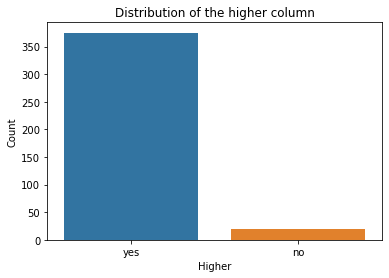

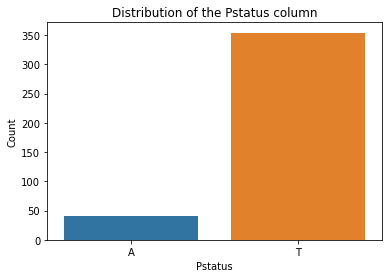

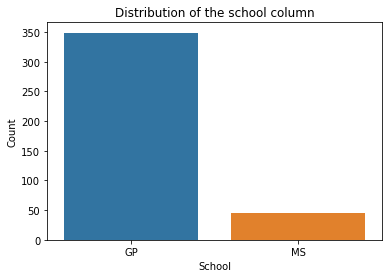

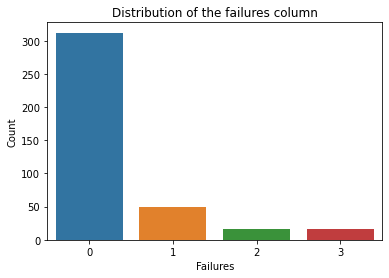

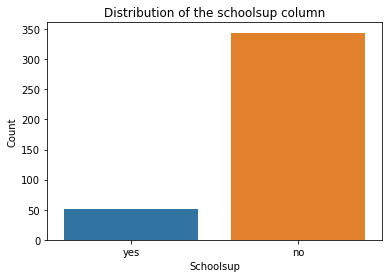

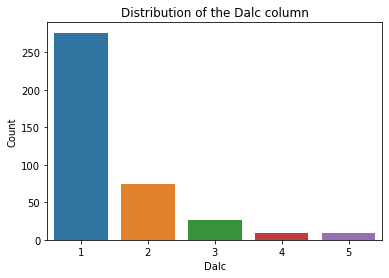

In [8]:
for column in summary[summary['skewness']>2].index:
    sns.countplot(data[column])
    plt.ylabel('Count')
    plt.xlabel(column.capitalize())
    plt.title('Distribution of the {} column'.format(column))
    plt.show()

In [9]:
data['higher'].value_counts()

yes    375
no      20
Name: higher, dtype: int64

The higher column contains information if a particular student desire to take higher education. Since the feature is highly skewed (as one option is ten times more represented then the second) the feature will be dropped as it might lead to false generalization.
The rest of the boolean categories have slightly better distribution, so no further action was needed.

The Dalc column (workday alcohol consumption) and failures (number of past class failures) have underrepresented options. So they will be grouped in more general options to reduce skewness.

In [10]:
data.drop(['higher'], axis=1, inplace=True)

The number of failures was regrouped into two options to reduce skewness.

Text(0.5, 1.0, 'Distribution of the number of failed past classes')

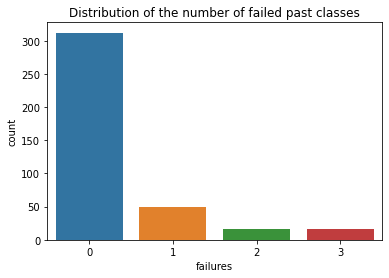

In [11]:
sns.countplot(data['failures'])
plt.title('Distribution of the number of failed past classes')

In [12]:
data['failures'] = data['failures'].apply(lambda x: 'No' if x == 0  else 'Yes')

Text(0.5, 1.0, 'Distribution of the number of failed past classes')

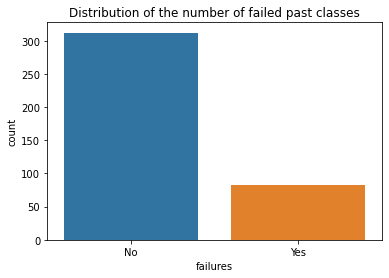

In [13]:
sns.countplot(data['failures'])
plt.title('Distribution of the number of failed past classes')

Text(0.5, 1.0, 'Distribution of workday alcohol consumption by students')

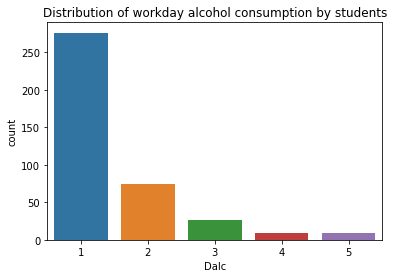

In [14]:
sns.countplot(data['Dalc'])
plt.title('Distribution of workday alcohol consumption by students')

In [15]:
def regroup_dalc(x):
    if x == 1:
        return 'very low'
    elif x == 2:
        return 'low'
    else:
        return 'considerable'
    
data['Dalc'] = data['Dalc'].apply(regroup_dalc)

Text(0.5, 1.0, 'Distribution of workday alcohol consumption by students')

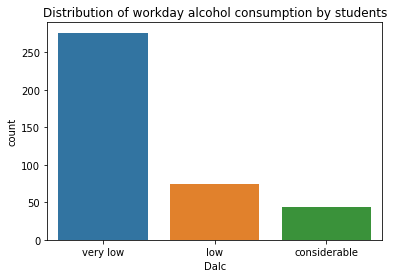

In [16]:
sns.countplot(data['Dalc'])
plt.title('Distribution of workday alcohol consumption by students')

The final skewness are as follows:

In [17]:
data[['Dalc', 'failures']].apply(LabelEncoder().fit_transform).skew().abs()

Dalc        1.376056
failures    1.428477
dtype: float64

And the age distribution are as follows:

Text(0.5, 1.0, 'Distribution of students age')

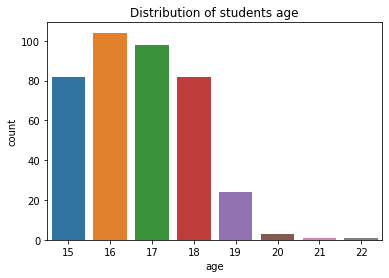

In [18]:
sns.countplot(data['age'])
plt.title('Distribution of students age')

In [19]:
data['age'].value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

Due to the low number of samples of students older than 19 y.o., they were removed from the dataset:

In [20]:
data = data[data['age'] < 20]

Text(0.5, 1.0, 'Comparison between male and female students')

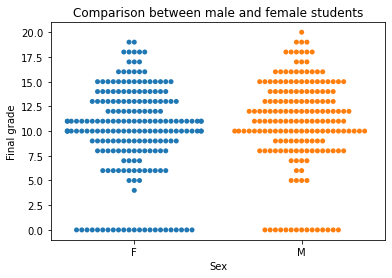

In [24]:
sns.swarmplot(x='sex', y='G3', data=data)
plt.xlabel('Sex')
plt.ylabel('Final grade')
plt.title('Comparison between male and female students')

In [25]:
data['sex'].value_counts()

F    207
M    183
Name: sex, dtype: int64

Women tend to have better grades and have a lower number of 0 scores.

The next part of the study was a comparison of the scores in the function of the age of a student.

Text(0.5, 1.0, 'Comparison between male and female students')

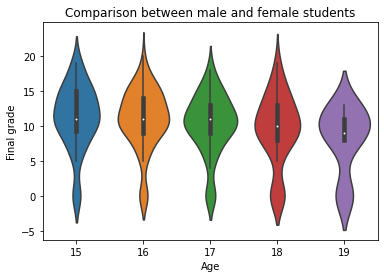

In [26]:
sns.violinplot(x='age', y='G3', data=data)
plt.xlabel('Age')
plt.ylabel('Final grade')
plt.title('Comparison between male and female students')

In [27]:
data['age'].value_counts()

16    104
17     98
18     82
15     82
19     24
Name: age, dtype: int64

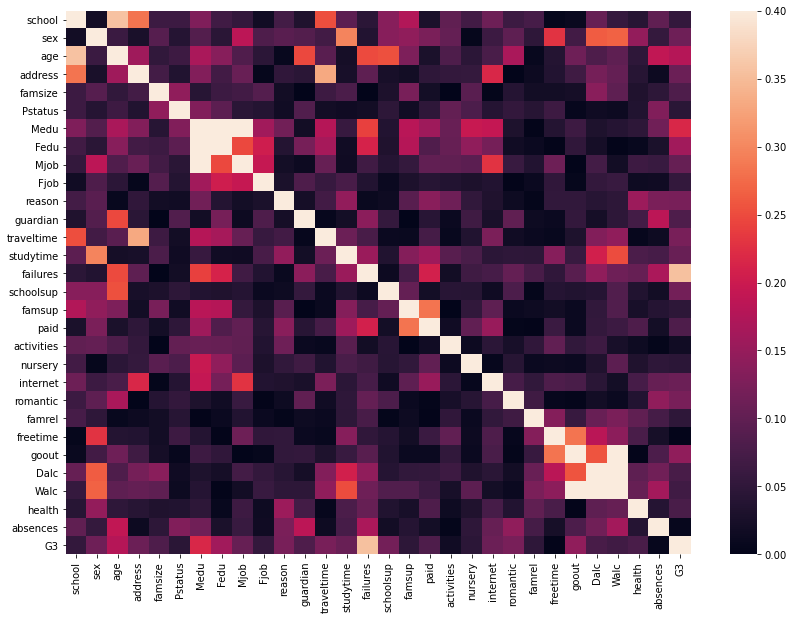

In [35]:
labeled_data = data.apply(LabelEncoder().fit_transform)
plt.figure(figsize=(14, 10))
sns.heatmap(labeled_data.corr().abs(), vmax=0.4)

The heatmap legend has the upper boundary set to 0.4 to increase readability.

The heatmap shows a high correlation between features: 
- mother's and father's education and job
- alcohol consumption (both workday and weekend) and amount of going out with friends
- address (urban or rural) and travel time

### Splitting datset

First, there was investigated if all numerical attributes are ordered.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [40]:
data.head(5)

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Walc,health,...,failures_Yes,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,internet_yes,romantic_yes,Dalc_low,Dalc_very low
0,18,4,4,2,2,4,3,4,1,3,...,0,1,0,0,0,1,0,0,0,1
1,17,1,1,1,2,5,3,3,1,3,...,0,0,1,0,0,0,1,0,0,1
2,15,1,1,1,2,4,3,2,3,3,...,1,1,0,1,0,1,1,0,1,0
3,15,4,2,1,3,3,2,2,1,5,...,0,0,1,1,1,1,1,1,0,1
4,16,3,3,1,2,4,3,2,2,5,...,0,0,1,1,0,1,0,0,0,1


In the following step, the goal distribution was analyzed. Furthermore, an attempt was made to normalize the data.


 mu = 10.40 and sigma = 4.58



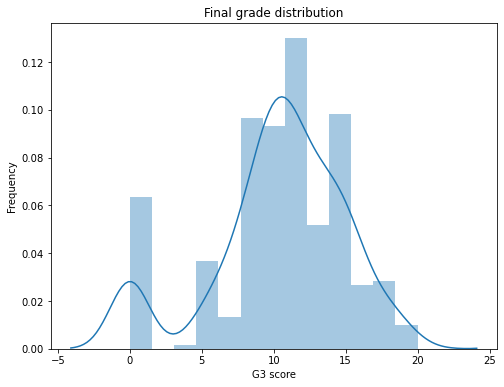

In [41]:
plt.figure(figsize=(8, 6))
sns.distplot(data['G3'])
mu, sigma = norm.fit(data['G3'])

plt.xlabel('G3 score')
plt.ylabel('Frequency')
plt.title('Final grade distribution')
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

In [42]:
data['G3'] = np.log1p(data['G3'])


 mu = 2.25 and sigma = 0.78



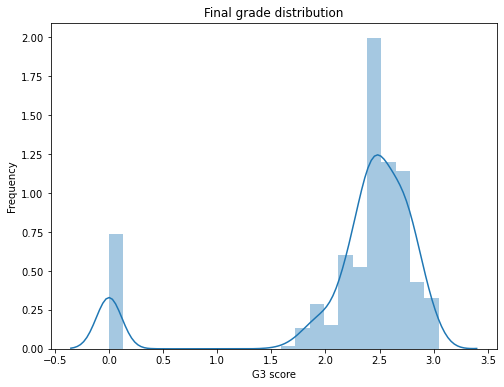

In [43]:
plt.figure(figsize=(8, 6))
sns.distplot(data['G3'])
mu, sigma = norm.fit(data['G3'])

plt.xlabel('G3 score')
plt.ylabel('Frequency')
plt.title('Final grade distribution')
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

The log1p succeded in normalizing the data. But the gap still remains as any of transformation cannot remove it.

Dividing the data into train and test set:

85% - train

15% - test

CV set will be divided from train set when it is needed.

In [44]:
train_X, test_X, train_Y, test_Y = train_test_split(data.drop(['G3'], axis=1), data['G3'], train_size=0.85, shuffle=True, random_state=1000)

Having all features in a similar range can improve the performance of most of ML models.

In [45]:
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

### I )Simple Linear Regression

This chapter starts with a simple linear regression before checking more robust models.

In [46]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(train_X, train_Y)

LinearRegression()

Later, the scorer was created. MSE (mean squared error) was selected as in this metric high errors are punished more.

In [47]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

scorer = make_scorer(mean_squared_error, greater_is_better=True, squared=True)

In [48]:
scorer(linear_model, test_X, test_Y)

0.5321613817118221

In [49]:
def regression_graph(y_true, y_pred, model_name):
    plt.figure(figsize=(12, 8))
    n = len(y_true)
    ax = sns.scatterplot(x=range(n), y=y_true)
    ax = sns.scatterplot(x=range(n), y=y_pred, marker="s", s=45)
    ax = plt.vlines(range(n), y_true, y_pred, linestyles='dotted')

    plt.legend(title='', loc='upper right', labels=['Actual values', 'Predicted values'])
    plt.xlabel('Number of the sample')
    plt.ylabel('Final score')
    plt.title('Predicted final scores using the {} model'.format(model_name))

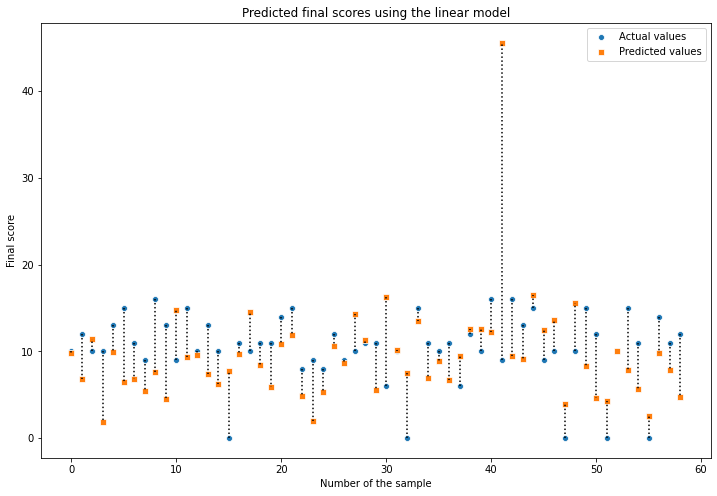

In [50]:
regression_graph(np.expm1(test_Y), np.expm1(linear_model.predict(test_X)), 'linear')

The errors are quite high in most of the cases, but there are some accurate predictions as well. The model avoids predicting 0s because predicting 0s leads to high penalty if a student score is a positive value.

The further move was trying more robust models. The best configurations of hyperparameters were found by using the GridSearch.

In [51]:
model_scores = pd.DataFrame(columns=['CV score', 'Test score'])

### II) Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
X = data[["failures"]]
y = data["G_avg"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)
lg = LinearRegression()
poly = PolynomialFeatures()
X_train_fit = poly.fit_transform(X_train)
lg.fit(X_train_fit, y_train)
X_test_fit = poly.fit_transform(X_test)
predicted = lg.predict(X_test_fit)
print ("MSE :", metrics.mean_squared_error(y_test,predicted))
print("R squared :", metrics.r2_score(y_test,predicted))

MSE : 9.58742956046755<br>
R squared : 0.15621441146351

### III - VI ) Ridge, Lasso and ELasticNet Regression, Huber parameter

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.linear_model import RidgeCV, ElasticNetCV, LassoCV


ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 10, 30, 60, 100, 300, 600, 1000], scoring = scorer)
ridge.fit(train_X, train_Y)
result = cross_val_score(ridge, train_X, train_Y, scoring = scorer, cv = 10, n_jobs=-1).mean()
ridge.fit(train_X, train_Y)
result_test = scorer(ridge, test_X, test_Y)
model_scores.loc['ridge'] = [result, result_test]

lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1], 
                max_iter = 50000)
lasso.fit(train_X, train_Y)
result = cross_val_score(lasso, train_X, train_Y, scoring = scorer, cv = 10, n_jobs=-1).mean()
lasso.fit(train_X, train_Y)
result_test = scorer(lasso, test_X, test_Y)
model_scores.loc['lasso'] = [result, result_test]


params_GBR_grid = {'n_estimators': (100, 500), 'max_depth': (2, 4), 'min_samples_split':(1, 2), 'learning_rate': (0.05,), 'min_samples_leaf': (3, 5, 10), 'max_features': ('sqrt',), 'loss': ('huber',)}
GBR = ensemble.GradientBoostingRegressor()
GBR_GS = GridSearchCV(GBR, params_GBR_grid, scoring=scorer, n_jobs=-1)
GBR_GS.fit(train_X, train_Y)
GBR = ensemble.GradientBoostingRegressor(**GBR_GS.best_params_)
GBR.fit(train_X, train_Y)
result = cross_val_score(GBR, train_X, train_Y, scoring = scorer, cv = 10, n_jobs=-1).mean()
result_test = scorer(GBR, test_X, test_Y)
model_scores.loc['GRB'] = [result, result_test]



elastic_net = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elastic_net.fit(train_X, train_Y)
result = cross_val_score(elastic_net, train_X, train_Y, scoring = scorer, cv = 10, n_jobs=-1).mean()
elastic_net.fit(train_X, train_Y)
result_test = scorer(elastic_net, test_X, test_Y)
model_scores.loc['elastic net'] = [result, result_test]

#### Huber parameter

The Huber loss [Huber] is a robust loss function for regression problems defined as
![huber.png](https://miro.medium.com/max/686/1*1T2GUG02nZK7N8hEdw_DVA.png)

where y is the target variable, ŷ are the corresponding predictions and α ∈ ℝ⁺ is a hyperparameter. It is tempting to look at this loss as the log-likelihood function of an underlying heavy tailed error distribution. Indeed, for absolute errors smaller than α the corresponding distribution resembles the normal distribution, outside this region it coincides with the more heavy-tailed Laplace distribution. This is precisely the reason why this loss is robust against outliers.

In [53]:
GBR_GS.best_params_

{'learning_rate': 0.05,
 'loss': 'huber',
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [54]:
GBR.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.05,
 'loss': 'huber',
 'max_depth': 2,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

The GBR model gave the best predictions on the test set. Rest of the models generalize just better than the linear regression model.

Below are presented regression graphs for all of the models.

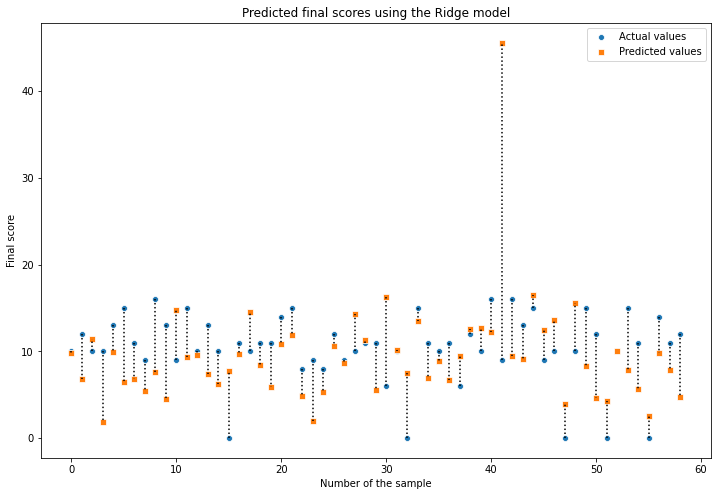

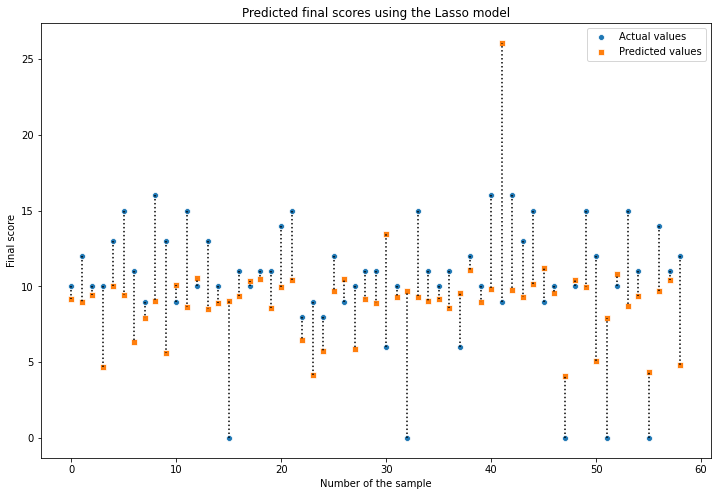

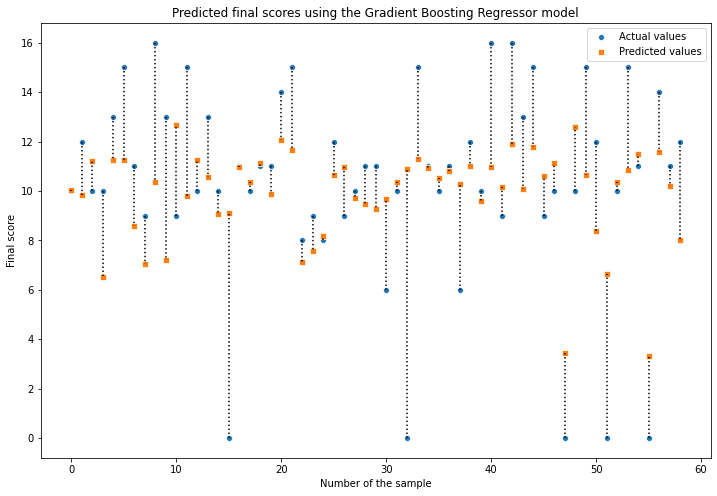

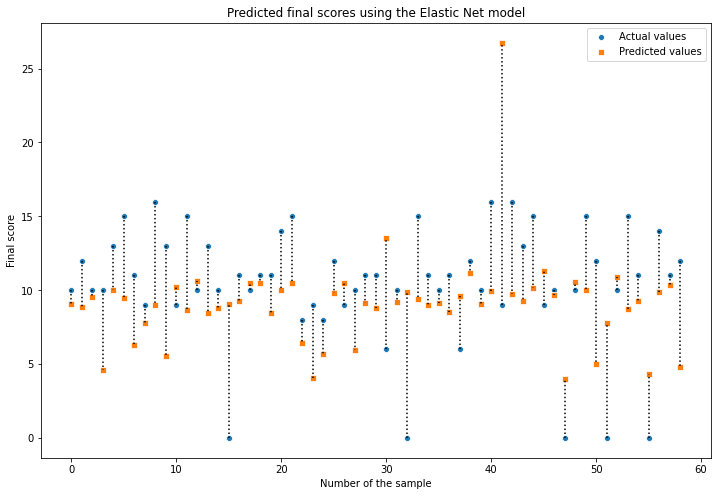

In [56]:
for name, model in {'Ridge': ridge, 'Lasso': lasso, 'Gradient Boosting Regressor': GBR, 'Elastic Net': elastic_net}.items():
    regression_graph(np.expm1(test_Y), np.expm1(model.predict(test_X)), name)

The GBR model avoids making high errors which are highly penalized by the MSE loss function. The model predicted multiple samples correctly but on the same time there are many high errors.

The ridge model has many accurate predictions, but at the same time, it has a few predictions quite different from true values, which make the test score low.

The ridge, lasso and elastic net models generally predict scores in a narrow range in the average grade neighbourhood. This is expected as these models include parameters regularization.

### Feature importance

The linear model was used for visualization of feature importance, as it's easier to retrieve coefficients than on the GBR model.

In [57]:
# Fething coeficients, their name and rescalling to percents
importance = pd.Series(linear_model.coef_)
importance = importance / importance.abs().sum()*100
pd.concat([pd.Series(data.drop(['G3'], axis=1).columns), importance.abs()], axis=1).sort_values(1, ascending=False)
graph_data = pd.concat([pd.Series(data.drop(['G3'], axis=1).columns), importance], axis=1)

In [58]:
# Ordering data
graph_data = graph_data.sort_values(1, ascending=True)
graph_data = graph_data.reset_index()
graph_data[0] = pd.Categorical(graph_data[0])

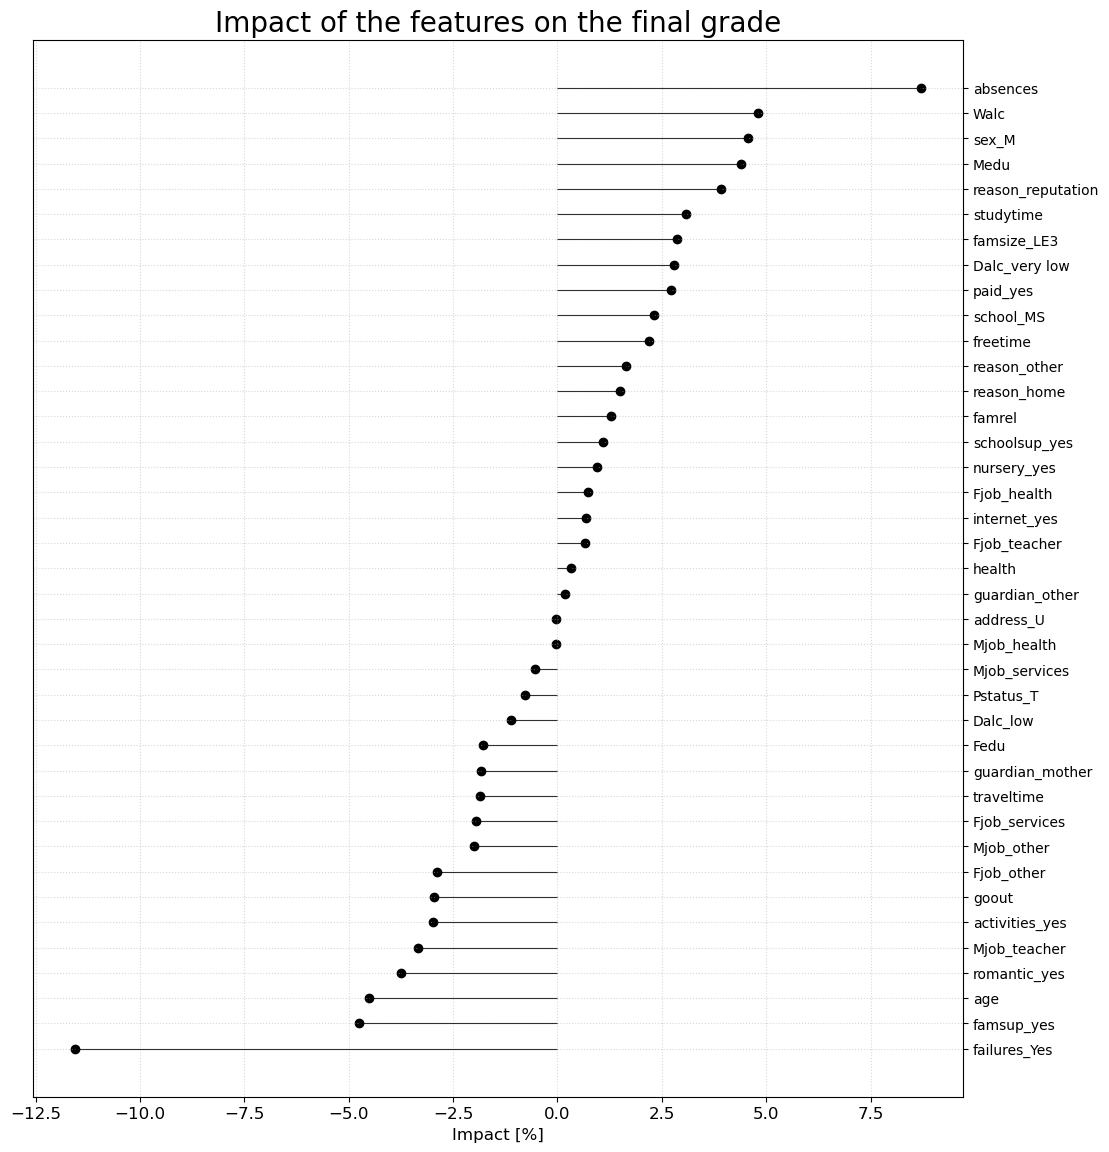

In [59]:
# Plotting the graph
fig = plt.figure(figsize=(12,14), dpi= 100)
ax = fig.add_subplot(111)
ax.yaxis.tick_right()
plt.hlines(y=graph_data.index, xmin=0, xmax=graph_data[1], color='black', alpha=.8, linewidth=.8)
plt.scatter(graph_data[1], graph_data.index, color='black')
plt.yticks(graph_data.index, graph_data[0])
plt.xticks(fontsize=12)
plt.xlabel('Impact [%]', fontsize=12)

# Decorate
plt.title('Impact of the features on the final grade', fontdict={'size':20})
plt.grid(linestyle='dotted', alpha=0.5)
plt.show()

In [55]:
model_scores

,CV score,Test score
ridge,0.558082,0.532148
lasso,0.547108,0.493409
GRB,0.516482,0.384102
elastic net,0.556989,0.494499


#### Observations and Conclusion:

* We have loaded our Portugese student dataset
* Pre processing and EDA was performed to know about skewness
* It was decided to drop some columns and re group some
* Categorical columns were converted to numerical
* Linear, Ploynomial, LAsso, Ridge, elastic net and Huber parameter were explored

RIDGE performs best on both train and test dataset

Collecting more data, especially for the students with the less represented selections, would improve model and regression performance.